In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
from sklearn.ensemble import RandomForestRegressor



In [3]:

# fetch dataset 
daily_demand_forecasting_orders = fetch_ucirepo(id=409) 
  
# data (as pandas dataframes) 
X = daily_demand_forecasting_orders.data.features 
y = daily_demand_forecasting_orders.data.targets 
 
# Check the first few rows of the features and target
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   Week of the month  Day of the week  Non-urgent order  Urgent order  \
0                  1                4           316.307       223.270   
1                  1                5           128.633        96.042   
2                  1                6            43.651        84.375   
3                  2                2           171.297       127.667   
4                  2                3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448                 0.000   
1        38.058        56.037       130.580                 0.000   
2        21.826        25.125        82.461                 1.386   
3        41.542       113.294       162.284                18.156   
4        37.679        56.618       116.220                 6.459   

   Orders from the traffic controller sector  Banking orders (1)  \
0                                      65556               44914

In [4]:

# variable information 
print("\nVariables:")
print(daily_demand_forecasting_orders.variables) 


Variables:
                                         name     role        type  \
0                           Week of the month  Feature     Integer   
1                             Day of the week  Feature     Integer   
2                            Non-urgent order  Feature  Continuous   
3                                Urgent order  Feature  Continuous   
4                                Order type A  Feature  Continuous   
5                                Order type B  Feature  Continuous   
6                                Order type C  Feature  Continuous   
7                        Fiscal sector orders  Feature  Continuous   
8   Orders from the traffic controller sector  Feature     Integer   
9                          Banking orders (1)  Feature     Integer   
10                         Banking orders (2)  Feature     Integer   
11                         Banking orders (3)  Feature     Integer   
12                               Total orders   Target  Continuous   

   demo

In [5]:
# Combine features and target
data = pd.concat([X, y], axis=1)

# Check the first few rows
print(data.head())



   Week of the month  Day of the week  Non-urgent order  Urgent order  \
0                  1                4           316.307       223.270   
1                  1                5           128.633        96.042   
2                  1                6            43.651        84.375   
3                  2                2           171.297       127.667   
4                  2                3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448                 0.000   
1        38.058        56.037       130.580                 0.000   
2        21.826        25.125        82.461                 1.386   
3        41.542       113.294       162.284                18.156   
4        37.679        56.618       116.220                 6.459   

   Orders from the traffic controller sector  Banking orders (1)  \
0                                      65556               44914   
1         

In [6]:
#Convert 'Week of the month' and 'Day of the week' to categorical
data['Week of the month'] = data['Week of the month'].astype('category')
data['Day of the week'] = data['Day of the week'].astype('category')


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


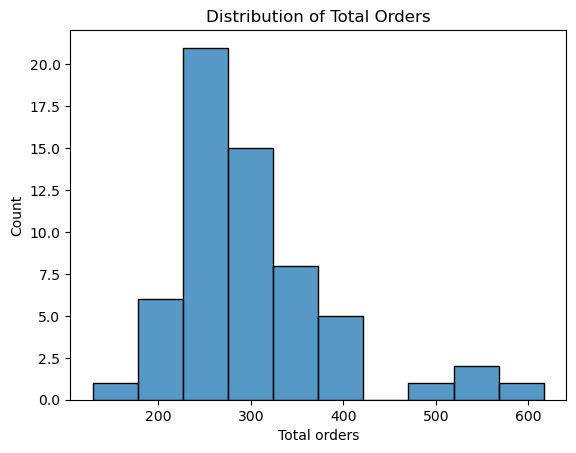

In [7]:


sns.histplot(data['Total orders'])
plt.title('Distribution of Total Orders')
plt.show()


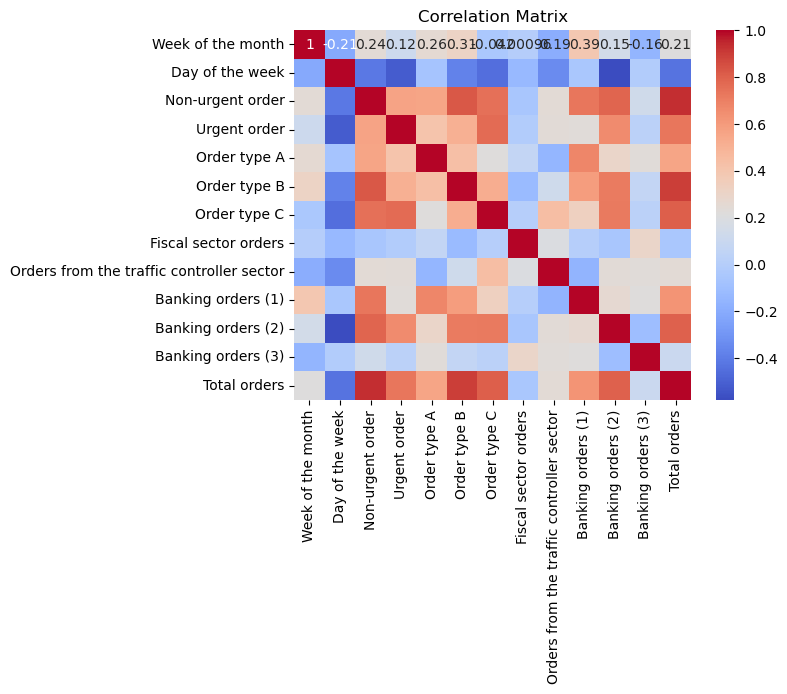

In [8]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [9]:


# Split data into features and target without dropping any variables
X = data.drop(columns=['Total orders'])
y = data['Total orders']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'MAE with Linear Regression: {mae_lr}')
print(f'MSE with Linear Regression: {mse_lr}')
print(f'RMSE with Linear Regression: {rmse_lr}')
print(f'R² with Linear Regression: {r2_lr}')

MAE with Linear Regression: 2.3992659710832718e-12
MSE with Linear Regression: 7.991030544885853e-24
RMSE with Linear Regression: 2.8268410894293038e-12
R² with Linear Regression: 1.0


Initial MAE with feature engineering: 22.06718090909086


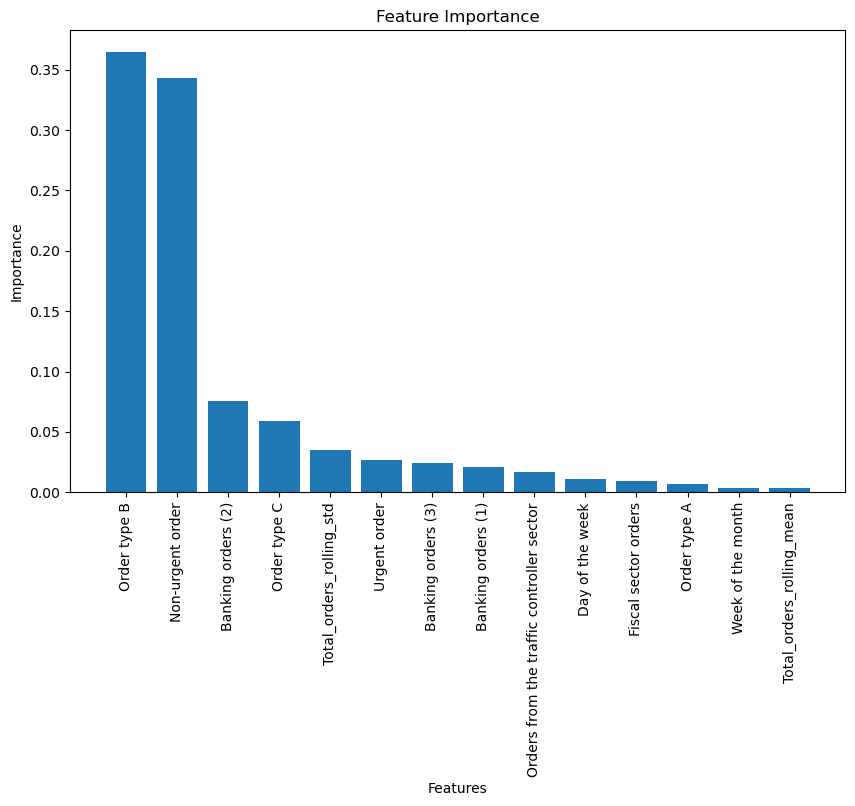

MAE with top features: 19.552983636363635
Cross-validated MAE with top features: 23.2763279272727


In [10]:

# Fetch dataset
daily_demand_forecasting_orders = fetch_ucirepo(id=409)
X = daily_demand_forecasting_orders.data.features
y = daily_demand_forecasting_orders.data.targets
data = pd.concat([X, y], axis=1)

# Feature Engineering: Rolling Window Statistics
data['Total_orders_rolling_mean'] = data['Total orders'].rolling(window=7).mean()
data['Total_orders_rolling_std'] = data['Total orders'].rolling(window=7).std()
data = data.dropna()

# Split data into features and target
X = data.drop(columns=['Total orders'])
y = data['Total orders']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the initial Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and initial evaluation
y_pred = model.predict(X_test)
mae_initial = mean_absolute_error(y_test, y_pred)
print(f'Initial MAE with feature engineering: {mae_initial}')

# Calculate feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance (optional)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# Select top features
threshold = 0.01  # Example threshold
top_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain model with top features
model.fit(X_train_top, y_train)
y_pred_top = model.predict(X_test_top)
mae_top = mean_absolute_error(y_test, y_pred_top)
print(f'MAE with top features: {mae_top}')

# Cross-validation with top features
from sklearn.model_selection import cross_val_score
scores_top = cross_val_score(model, X[top_features], y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE with top features: {-scores_top.mean()}')



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best MAE after Hyperparameter Tuning: 19.48780863636363
Cross-validated MAE of best model: 23.302459430909057


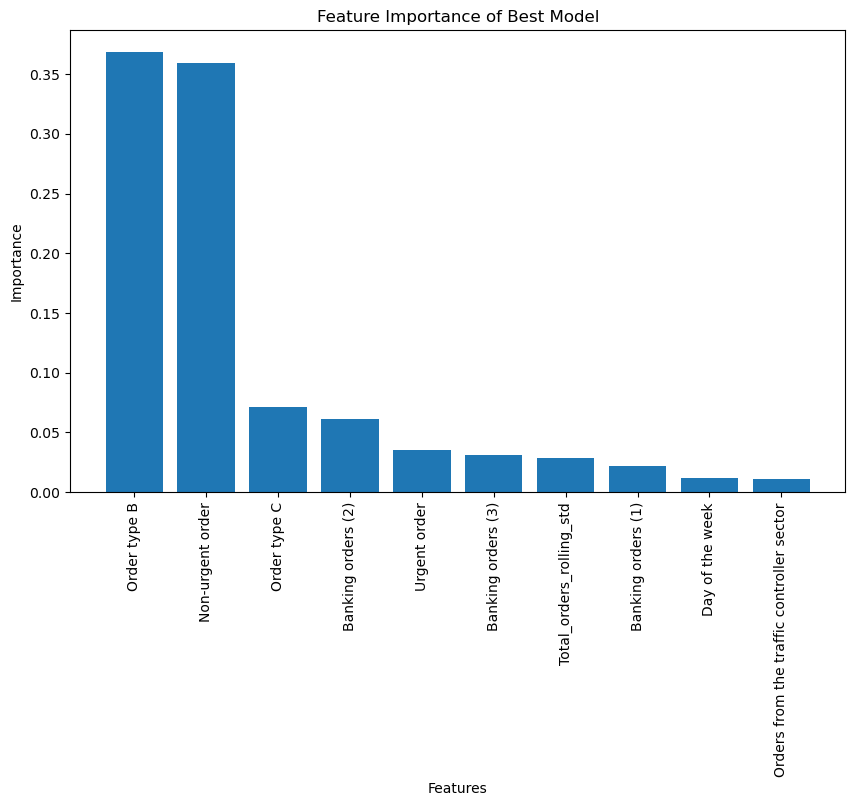

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_top, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_top)

mae_best = mean_absolute_error(y_test, y_pred_best)
print(f'Best MAE after Hyperparameter Tuning: {mae_best}')

# Cross-validated performance of the best model
scores_best = cross_val_score(best_model, X[top_features], y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE of best model: {-scores_best.mean()}')

# Visualize feature importance of the best model (optional)
best_importances = best_model.feature_importances_
best_feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': best_importances})
best_feature_importance_df = best_feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(best_feature_importance_df['Feature'], best_feature_importance_df['Importance'])
plt.title('Feature Importance of Best Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


MAE with Gradient Boosting: 19.968180046558626
Cross-validated MAE with Gradient Boosting: 23.472941933995507


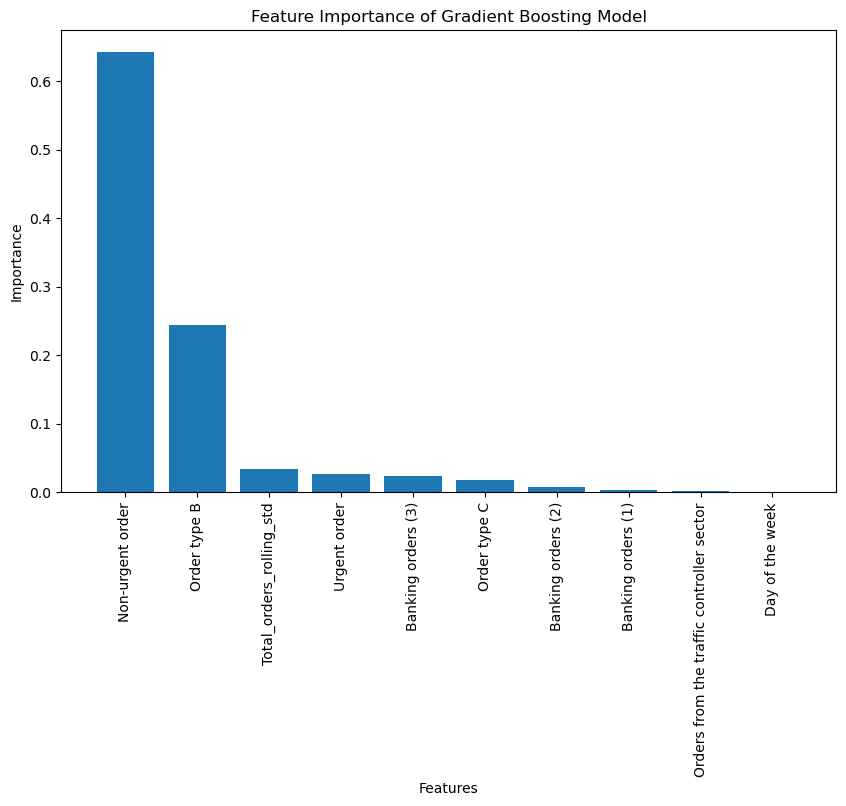

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Select top features
threshold = 0.01  # Example threshold
top_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_top, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_top)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'MAE with Gradient Boosting: {mae_gb}')

# Cross-validated performance of the Gradient Boosting model
scores_gb = cross_val_score(gb_model, X[top_features], y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE with Gradient Boosting: {-scores_gb.mean()}')

# Visualize feature importance
gb_importances = gb_model.feature_importances_
gb_feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': gb_importances})
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(gb_feature_importance_df['Feature'], gb_feature_importance_df['Importance'])
plt.title('Feature Importance of Gradient Boosting Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search_gb.fit(X_train_top, y_train)

# Get the best model
best_gb_model = grid_search_gb.best_estimator_

# Make predictions with the best model
y_pred_best_gb = best_gb_model.predict(X_test_top)

# Evaluate the best model
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
print(f'Best MAE with Gradient Boosting after Hyperparameter Tuning: {mae_best_gb}')

# Cross-validated performance of the best model
scores_best_gb = cross_val_score(best_gb_model, X[top_features], y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE of best Gradient Boosting model: {-scores_best_gb.mean()}')



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best MAE with Gradient Boosting after Hyperparameter Tuning: 20.21951080981142
Cross-validated MAE of best Gradient Boosting model: 19.553322308858505


In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


# Make predictions with the best model
y_pred_best_gb = best_gb_model.predict(X_test_top)

# Evaluate the best model using different metrics
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
rmse_best_gb = mean_squared_error(y_test, y_pred_best_gb, squared=False)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_best_gb = mean_absolute_percentage_error(y_test, y_pred_best_gb)

print(f'Best MAE with Gradient Boosting after Hyperparameter Tuning: {mae_best_gb}')
print(f'Best MSE with Gradient Boosting after Hyperparameter Tuning: {mse_best_gb}')
print(f'Best RMSE with Gradient Boosting after Hyperparameter Tuning: {rmse_best_gb}')
print(f'R² with Gradient Boosting after Hyperparameter Tuning: {r2_best_gb}')
print(f'Best MAPE with Gradient Boosting after Hyperparameter Tuning: {mape_best_gb}')


Best MAE with Gradient Boosting after Hyperparameter Tuning: 20.21951080981142
Best MSE with Gradient Boosting after Hyperparameter Tuning: 610.8238190599546
Best RMSE with Gradient Boosting after Hyperparameter Tuning: 24.714850172719128
R² with Gradient Boosting after Hyperparameter Tuning: 0.7633692676753332
Best MAPE with Gradient Boosting after Hyperparameter Tuning: 8.288174656372673


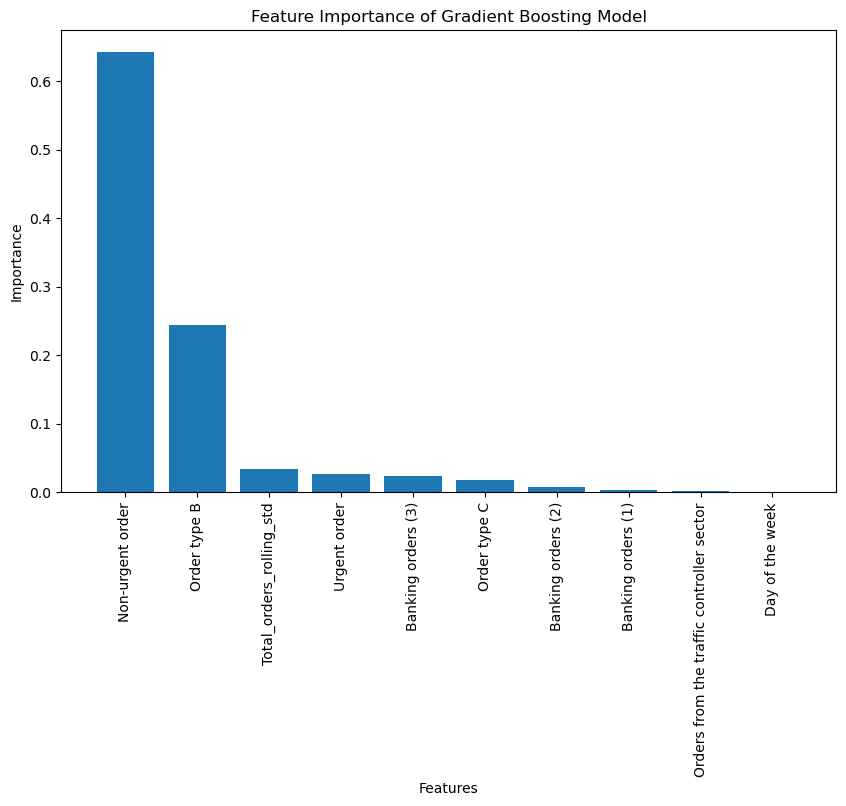

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
plt.bar(gb_feature_importance_df['Feature'], gb_feature_importance_df['Importance'])
plt.title('Feature Importance of Gradient Boosting Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [16]:
import pandas as pd
import numpy as np
import os

 # Create the directory if it does not exist
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

start_date = '2021-01-01'  # Replace with your actual start date

    # Generate a date range with the same length as y_test
date_range = pd.date_range(start=start_date, periods=len(y_test), freq='D')

    # Ensure y_test is a numpy array
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test
y_pred_gb_array = np.array(y_pred_gb)
# Create the DataFrame for forecast results
forecast_df_gb = pd.DataFrame({
    'Date': date_range,
    'Actual': y_test_array,  # Ensure y_test is converted to an array
    'Forecast': y_pred_gb_array  # Ensure y_pred_gb is correctly assigned
})


# Export forecast results for PowerBI
forecast_results_path_gb = os.path.join(output_dir, 'forecast_results_gb_3.csv')
forecast_df_gb.to_csv(forecast_results_path_gb, index=False)

# Verify the files are saved
print(f'Forecast results file saved: {os.path.exists(forecast_results_path_gb)}')



Forecast results file saved: True


In [17]:

# Define the path for the CSV file
feature_importance_path_gb = os.path.join(output_dir, 'feature_importance_gb.csv')

# Export the feature importance DataFrame to CSV
gb_feature_importance_df.to_csv(feature_importance_path_gb, index=False)

# Verify the file is saved
print(f'Feature importance file saved: {os.path.exists(feature_importance_path_gb)}')


Feature importance file saved: True
